# 1- Importanto as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2- Importação e limpeza de dados do dataset

In [2]:
df = pd.read_csv('gt_dataset.csv', encoding="ISO-8859-1")

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
print(df.describe())

            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
sorted(df.columns)

['INT_ANY',
 'INT_IDEO',
 'INT_LOG',
 'INT_MISC',
 'addnotes',
 'alternative',
 'alternative_txt',
 'approxdate',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'city',
 'claim2',
 'claim3',
 'claimed',
 'claimmode',
 'claimmode2',
 'claimmode2_txt',
 'claimmode3',
 'claimmode3_txt',
 'claimmode_txt',
 'compclaim',
 'corp1',
 'corp2',
 'corp3',
 'country',
 'country_txt',
 'crit1',
 'crit2',
 'crit3',
 'dbsource',
 'divert',
 'doubtterr',
 'eventid',
 'extended',
 'gname',
 'gname2',
 'gname3',
 'gsubname',
 'gsubname2',
 'gsubname3',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'hostkidoutcome',
 'hostkidoutcome_txt',
 'iday',
 'imonth',
 'individual',
 'ishostkid',
 'iyear',
 'kidhijcountry',
 'latitude',
 'location',
 'longitude',
 'motive',
 'multiple',
 'natlty1',
 'natlty1_txt',
 'natlty2',
 'natlty2_txt',
 'natlty3',
 'natlty3_txt',
 'ndays',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'nkill',
 'nkillter',
 'nkillus'

### 2.1- Seleção e renomeação de colunas

In [8]:
df = df[['iyear', 'imonth', 'iday', 'city', 'country_txt', 'region_txt', 'gname', 'attacktype1_txt', 'weaptype1_txt', 'suicide', 'targtype1_txt', 'nkill', 'nwound']]

In [9]:
df.rename(columns={'iyear':'Ano', 'imonth':'Mes', 'iday':'Dia', 'city':'Cidade', 'country_txt':'Pais', 'region_txt':'Regiao', 'gname':'Grupo_Terrorista', 'attacktype1_txt':'Modo_Atentado', 'weaptype1_txt':'Armamento', 'suicide':'Ataque_Suicida', 'targtype1_txt':'Tipo_Alvo', 'nkill':'Fatalidades', 'nwound':'Feridos'}, inplace=True)

In [10]:
df.Fatalidades = df.Fatalidades.fillna(0)

In [11]:
df.Feridos = df.Feridos.fillna(0)

In [12]:
df.Fatalidades = df.Fatalidades.astype('int', errors='ignore')

In [13]:
df.Feridos = df.Feridos.astype('int', errors='ignore')

### 2.2- Inserção de coluna para análise de baixas

In [14]:
df['Baixas'] = df.Fatalidades + df.Feridos

### 2.3- Resultado do processo de data cleaning

In [15]:
df.head()

,Ano,Mes,Dia,Cidade,Pais,Regiao,Grupo_Terrorista,Modo_Atentado,Armamento,Ataque_Suicida,Tipo_Alvo,Fatalidades,Feridos,Baixas
0,1970,7,2,Santo Domingo,Dominican Republic,Central America & Caribbean,MANO-D,Assassination,Unknown,0,Private Citizens & Property,1,0,1
1,1970,0,0,Mexico city,Mexico,North America,23rd of September Communist League,Hostage Taking (Kidnapping),Unknown,0,Government (Diplomatic),0,0,0
2,1970,1,0,Unknown,Philippines,Southeast Asia,Unknown,Assassination,Unknown,0,Journalists & Media,1,0,1
3,1970,1,0,Athens,Greece,Western Europe,Unknown,Bombing/Explosion,Explosives,0,Government (Diplomatic),0,0,0
4,1970,1,0,Fukouka,Japan,East Asia,Unknown,Facility/Infrastructure Attack,Incendiary,0,Government (Diplomatic),0,0,0


In [16]:
df.shape

(181691, 14)

In [17]:
df.describe()

,Ano,Mes,Dia,Ataque_Suicida,Fatalidades,Feridos,Baixas
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.036507,2.266860,2.883291,5.150151
std,13.259430,3.388303,8.814045,0.187549,11.227057,34.309746,40.555414
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,0.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1.000000,1570.000000,8191.000000,9574.000000


In [18]:
df.isnull().sum()

Ano                   0
Mes                   0
Dia                   0
Cidade              434
Pais                  0
Regiao                0
Grupo_Terrorista      0
Modo_Atentado         0
Armamento             0
Ataque_Suicida        0
Tipo_Alvo             0
Fatalidades           0
Feridos               0
Baixas                0
dtype: int64

In [19]:
print(f" Este conjunto de dados consiste em informações sobre atentados terroristas ocorridos em {df.Cidade.nunique()} cidades de {df.Pais.nunique()} países, distribuídos entre" +
     f" {df.Regiao.nunique()} regiões do mundo. Possui em torno de {df.index.nunique()} registros ocorridos entre os anos de {df.Ano.min()} e {df.Ano.max()}, resultando em torno de"
     f" {df.Baixas.sum()} baixas entre mortos e feridos.")

 Este conjunto de dados consiste em informações sobre atentados terroristas ocorridos em 36674 cidades de 205 países, distribuídos entre 12 regiões do mundo. Possui em torno de 181691 registros ocorridos entre os anos de 1970 e 2017, resultando em torno de 935736 baixas entre mortos e feridos.


# 3- Análises temporais

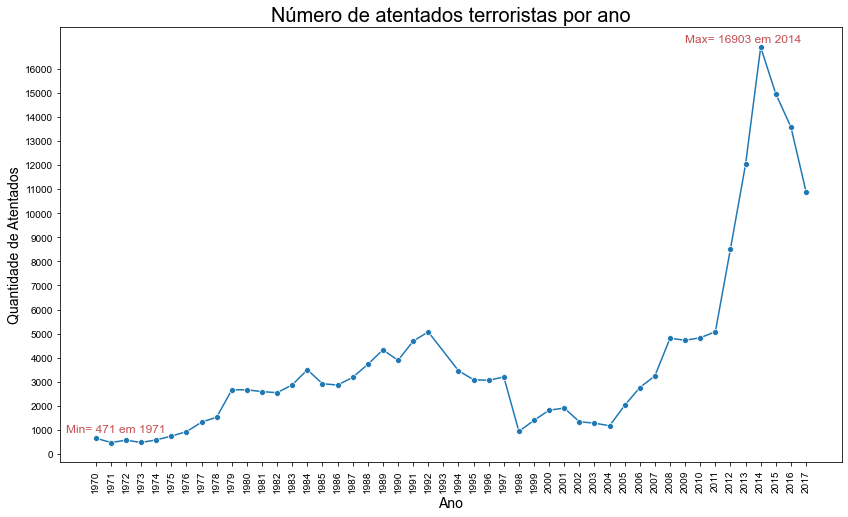

In [20]:
%matplotlib inline
plt.subplots(figsize=(14,8))
sns.set_theme(style="darkgrid")
dtaque = pd.pivot_table(data=df, index='Ano', values='Baixas', aggfunc='count')
sns.lineplot(data=dtaque, x="Ano", y="Baixas", marker="o")
plt.title("Número de atentados terroristas por ano", fontsize = 20)
plt.ylabel("Quantidade de Atentados", fontsize = 14)
plt.xlabel("Ano", fontsize = 14)
plt.yticks(np.arange(0, max(dtaque.Baixas)+1, 1000.0))
plt.xticks(np.arange(min(dtaque.index), max(dtaque.index)+1, 1.0), rotation=90)
plt.text(1968, 900, "Min= 471 em 1971", color='r')
plt.text(2009, 17100, "Max= 16903 em 2014", color='r' )
plt.show()

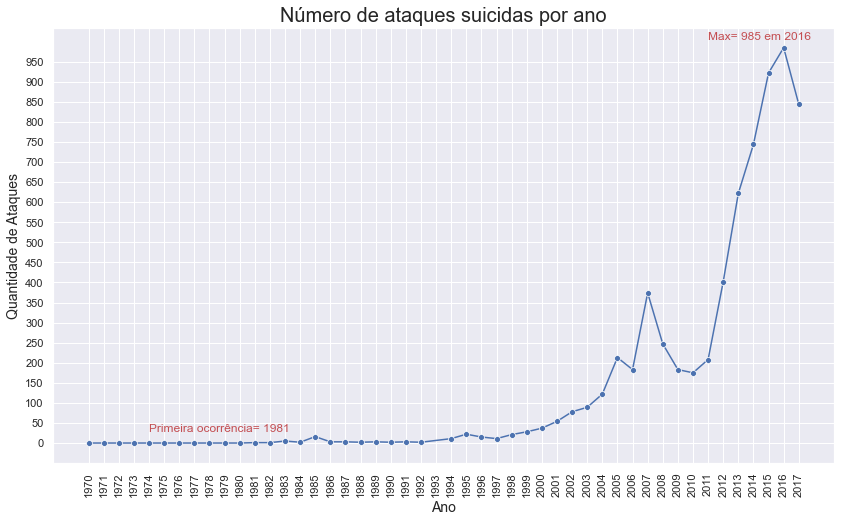

In [21]:
%matplotlib inline
plt.subplots(figsize=(14,8))
sns.set_theme(style="darkgrid")
dtscd = pd.pivot_table(data=df, index='Ano', values='Ataque_Suicida', aggfunc='sum')
sns.lineplot(data=dtscd, x="Ano", y="Ataque_Suicida", marker="o")
plt.title("Número de ataques suicidas por ano", fontsize = 20)
plt.ylabel("Quantidade de Ataques", fontsize = 14)
plt.xlabel("Ano", fontsize = 14)
plt.yticks(np.arange(0, max(dtscd.Ataque_Suicida)+1, 50))
plt.xticks(np.arange(min(dtscd.index), max(dtscd.index)+1, 1.0), rotation=90)
plt.text(1974, 28, "Primeira ocorrência= 1981", color='r')
plt.text(2011, 1005, "Max= 985 em 2016", color='r')
plt.show()

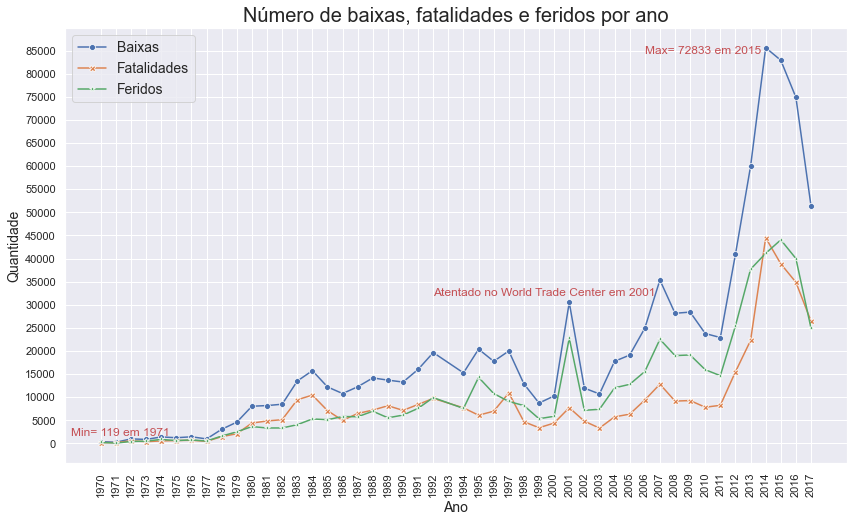

In [22]:
%matplotlib inline
plt.subplots(figsize=(14,8))
sns.set_theme(style="darkgrid")
dtbaixas = pd.pivot_table(data=df, index='Ano', values='Baixas', aggfunc='sum')
dtferidos = pd.pivot_table(data=df, index='Ano', values='Feridos', aggfunc='sum')
dtFatal = pd.pivot_table(data=df, index='Ano', values='Fatalidades', aggfunc='sum')
sns.lineplot(data=dtbaixas, x="Ano", y="Baixas", marker="o", label='Baixas')
sns.lineplot(data=dtFatal, x="Ano", y="Fatalidades", marker="X", label='Fatalidades')
sns.lineplot(data=dtferidos, x="Ano", y="Feridos", marker="*", label='Feridos')
plt.title("Número de baixas, fatalidades e feridos por ano", fontsize = 20)
plt.ylabel("Quantidade", fontsize = 14)
plt.xlabel("Ano", fontsize = 14)
plt.yticks(np.arange(0, max(dtbaixas.Baixas)+10, 5000.0))
plt.xticks(np.arange(min(dtbaixas.index), max(dtbaixas.index)+1, 1.0), rotation=90)
plt.text(1968, 1570, "Min= 119 em 1971", color='r')
plt.text(2006, 84400, "Max= 72833 em 2015", color='r')
plt.text(1992, 32000, "Atentado no World Trade Center em 2001", color='r')
plt.legend(prop={'size': 14})
plt.show()

# 4- Análises Geográficas

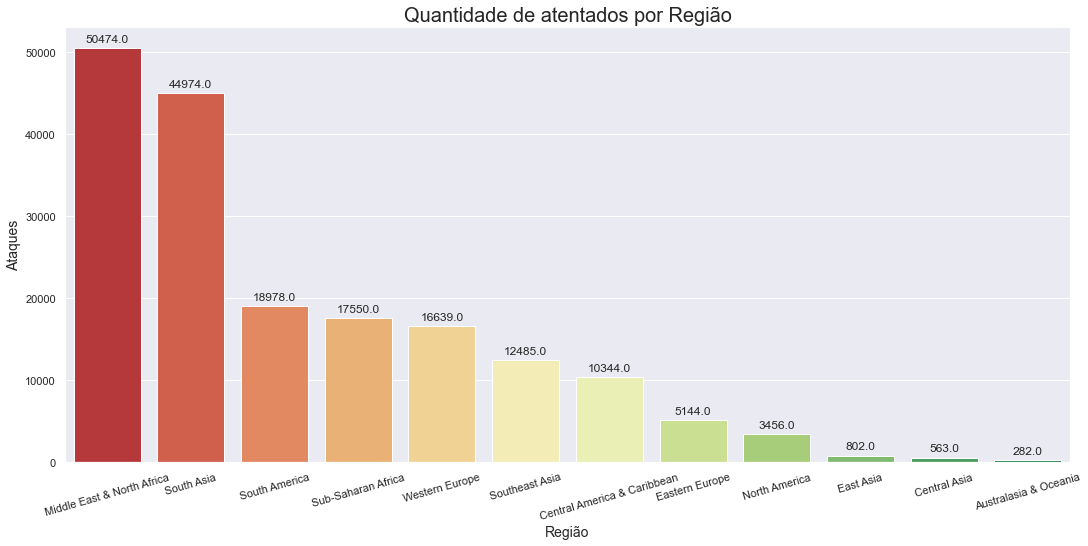

In [23]:
%matplotlib inline
plt.subplots(figsize=(18,8))
dfr = df.Regiao.value_counts().reset_index()
dfr.columns= ['Regiao', 'Ataques']
splot = sns.barplot(data=dfr, x='Regiao', y='Ataques', palette='RdYlGn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)
plt.ylabel("Ataques", fontsize = 14)
plt.xlabel("Região", fontsize = 14)
plt.xticks(rotation=16)
plt.title("Quantidade de atentados por Região", fontsize = 20)
plt.show()

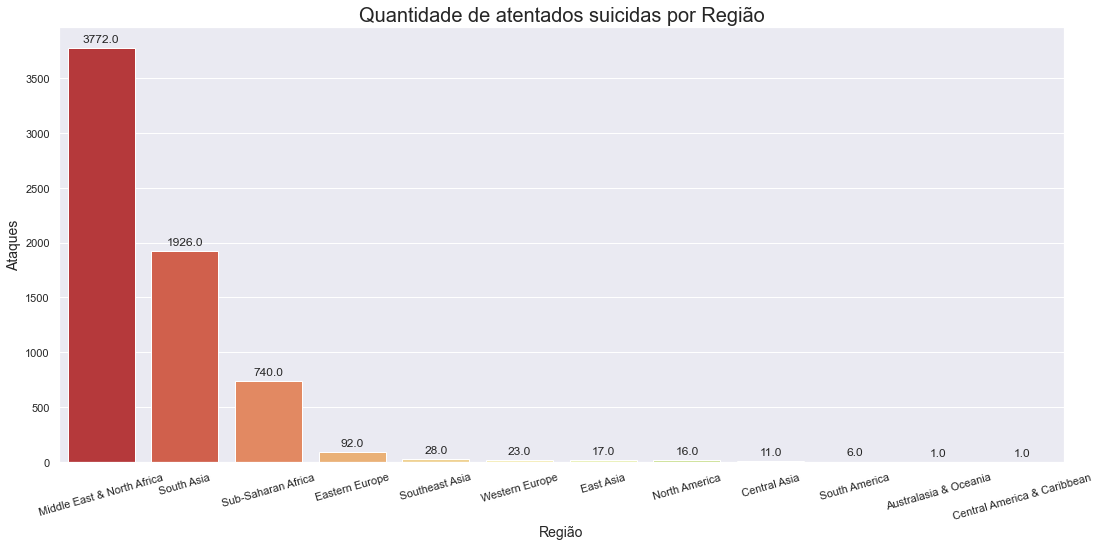

In [24]:
%matplotlib inline
plt.subplots(figsize=(18,8))
dfsr = df.groupby('Regiao').Ataque_Suicida.sum().to_frame().reset_index().sort_values('Ataque_Suicida', ascending=False)
dfsr.columns = ['Regiao', 'Ataque_Suicida']
splot = sns.barplot(data=dfsr, x='Regiao', y='Ataque_Suicida', palette='RdYlGn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)
plt.ylabel("Ataques", fontsize = 14)
plt.xlabel("Região", fontsize = 14)
plt.xticks(rotation=16)
plt.title("Quantidade de atentados suicidas por Região", fontsize = 20)
plt.show()

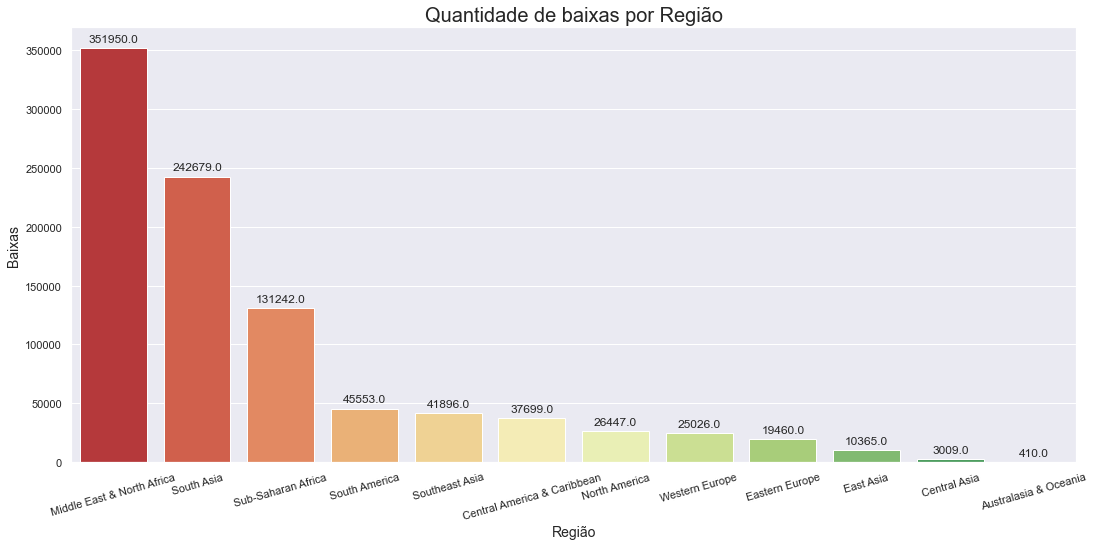

In [25]:
%matplotlib inline
plt.subplots(figsize=(18,8))
dfbr = df.groupby('Regiao').Baixas.sum().to_frame().reset_index().sort_values('Baixas', ascending=False)
dfbr.columns = ['Regiao', 'Baixas']
splot = sns.barplot(data=dfbr, x='Regiao', y='Baixas', palette='RdYlGn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)
plt.ylabel("Baixas", fontsize = 14)
plt.xlabel("Região", fontsize = 14)
plt.xticks(rotation=16)
plt.title("Quantidade de baixas por Região", fontsize = 20)
plt.show()

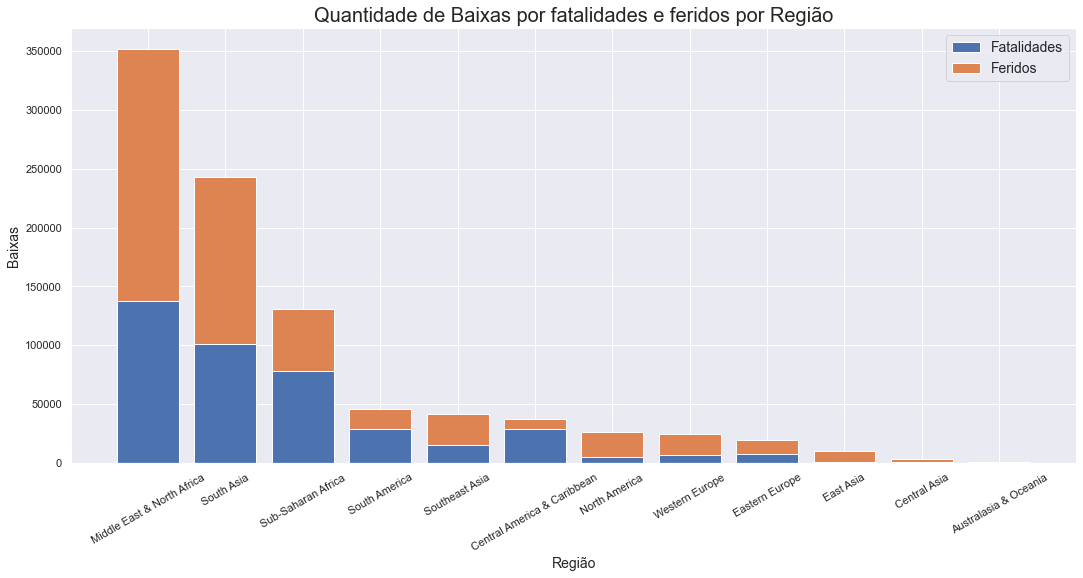

In [26]:
%matplotlib inline
dffr = df.groupby('Regiao')[['Fatalidades', 'Feridos']].sum().reset_index().sort_values(['Fatalidades', 'Feridos'], ascending=False)
dffr['Baixas'] = dffr.Fatalidades + dffr.Feridos
dffr.sort_values(by='Baixas', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(18,8))
ax.bar(dffr['Regiao'], dffr['Fatalidades'], label='Fatalidades')
ax.bar(dffr['Regiao'], dffr['Feridos'], label='Feridos', bottom=dffr['Fatalidades'])
ax.set_title('Quantidade de Baixas por fatalidades e feridos por Região')
ax.title.set_size(20)
ax.set_xlabel('Região')
plt.xticks(rotation=30)
ax.xaxis.label.set_size(14)
ax.set_ylabel('Baixas')
ax.yaxis.label.set_size(14)
ax.legend(prop={'size': 14})
plt.show()

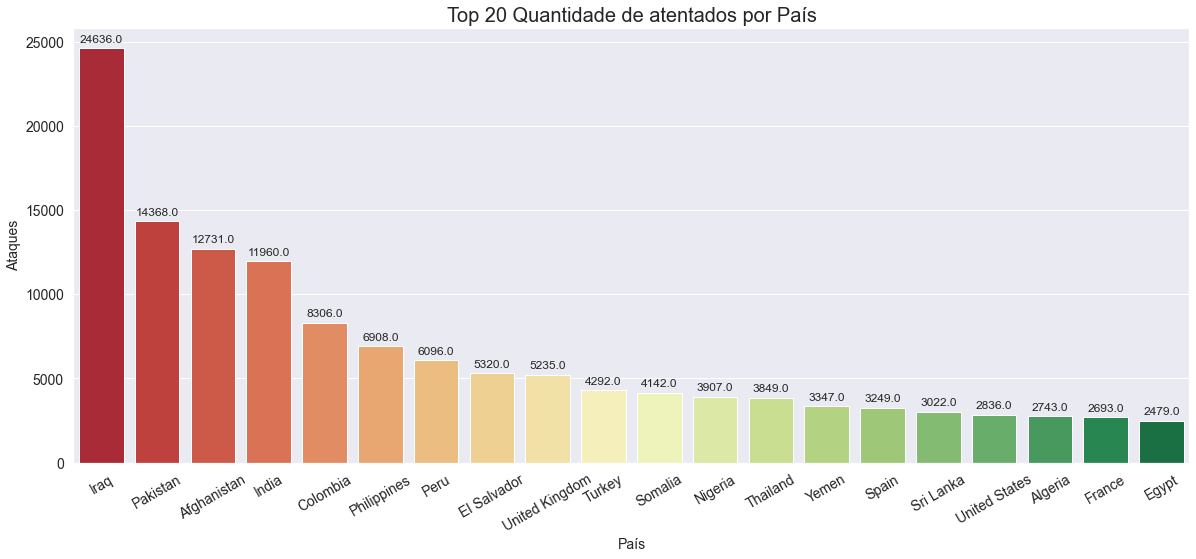

In [27]:
%matplotlib inline
plt.subplots(figsize=(20,8))
dfp = df.Pais.value_counts()[:20].reset_index()
dfp.columns = ['Pais', 'Ataques']
splot = sns.barplot(data=dfp, x='Pais', y='Ataques', palette='RdYlGn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)
plt.ylabel("Ataques", fontsize = 14)
plt.xlabel("País", fontsize = 14)
plt.xticks(rotation = 30, fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Top 20 Quantidade de atentados por País", fontsize = 20)
plt.show()

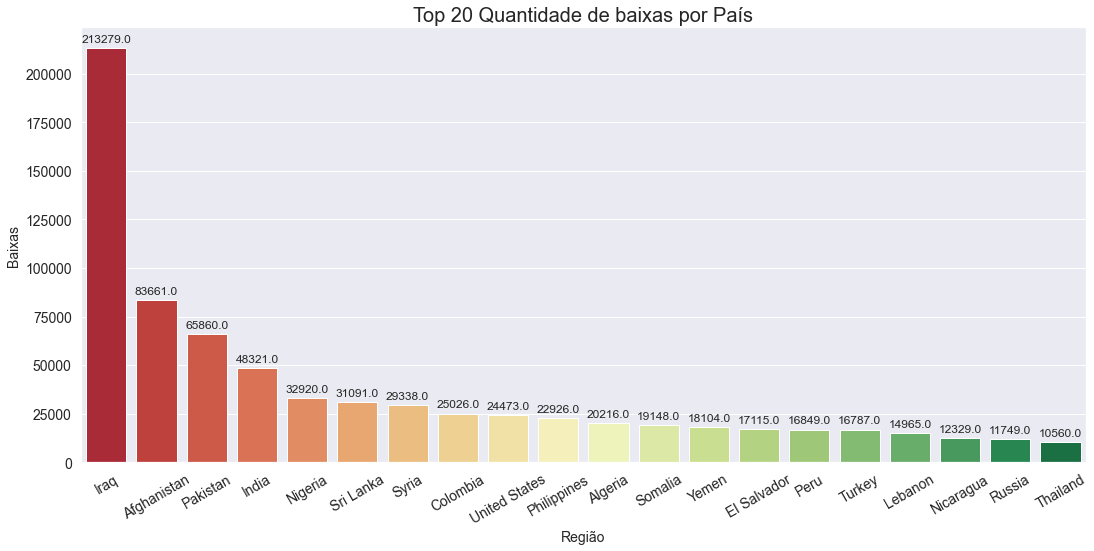

In [28]:
%matplotlib inline
plt.subplots(figsize=(18,8))
dfbp = df.groupby('Pais').Baixas.sum().to_frame().reset_index().sort_values('Baixas', ascending=False)[:20]
dfbp.columns = ['Pais', 'Baixas']
splot = sns.barplot(data=dfbp, x='Pais', y='Baixas', palette='RdYlGn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)
plt.ylabel("Baixas", fontsize = 14)
plt.xlabel("Região", fontsize = 14)
plt.xticks(rotation = 30, fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Top 20 Quantidade de baixas por País", fontsize = 20)
plt.show()

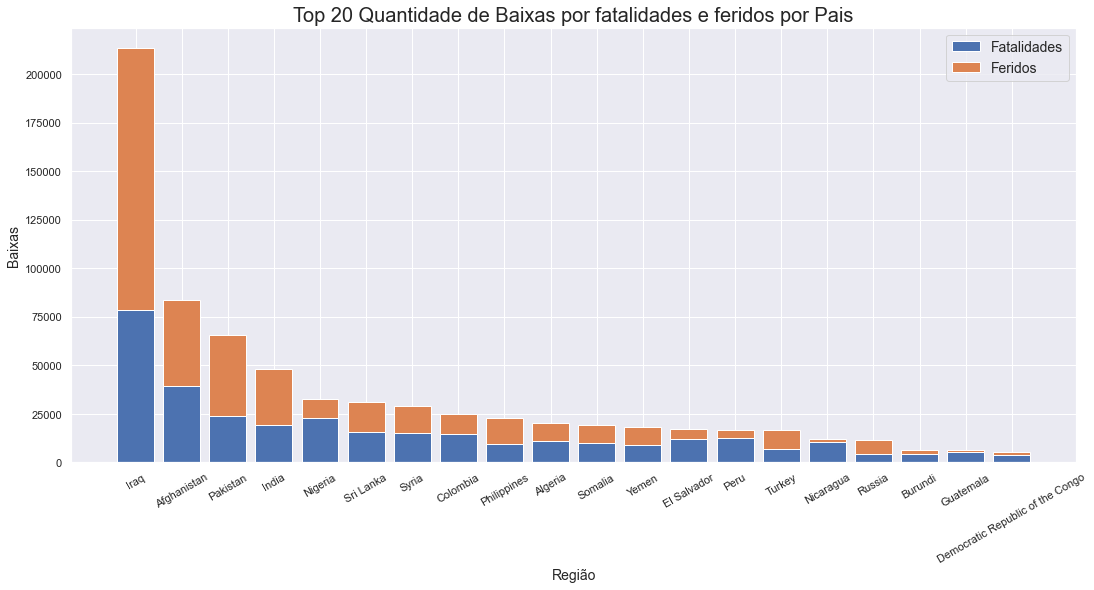

In [29]:
%matplotlib inline
dffr = df.groupby('Pais')[['Fatalidades', 'Feridos']].sum().reset_index().sort_values(['Fatalidades', 'Feridos'], ascending=False)[:20]
dffr['Baixas'] = dffr.Fatalidades + dffr.Feridos
dffr.sort_values(by='Baixas', ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(18,8))
ax.bar(dffr['Pais'], dffr['Fatalidades'], label='Fatalidades')
ax.bar(dffr['Pais'], dffr['Feridos'], label='Feridos', bottom=dffr['Fatalidades'])
ax.set_title('Top 20 Quantidade de Baixas por fatalidades e feridos por Pais')
ax.title.set_size(20)
ax.set_xlabel('Região')
plt.xticks(rotation=30)
ax.xaxis.label.set_size(14)
ax.set_ylabel('Baixas')
ax.yaxis.label.set_size(14)
plt.legend(prop={'size': 14})
plt.show()

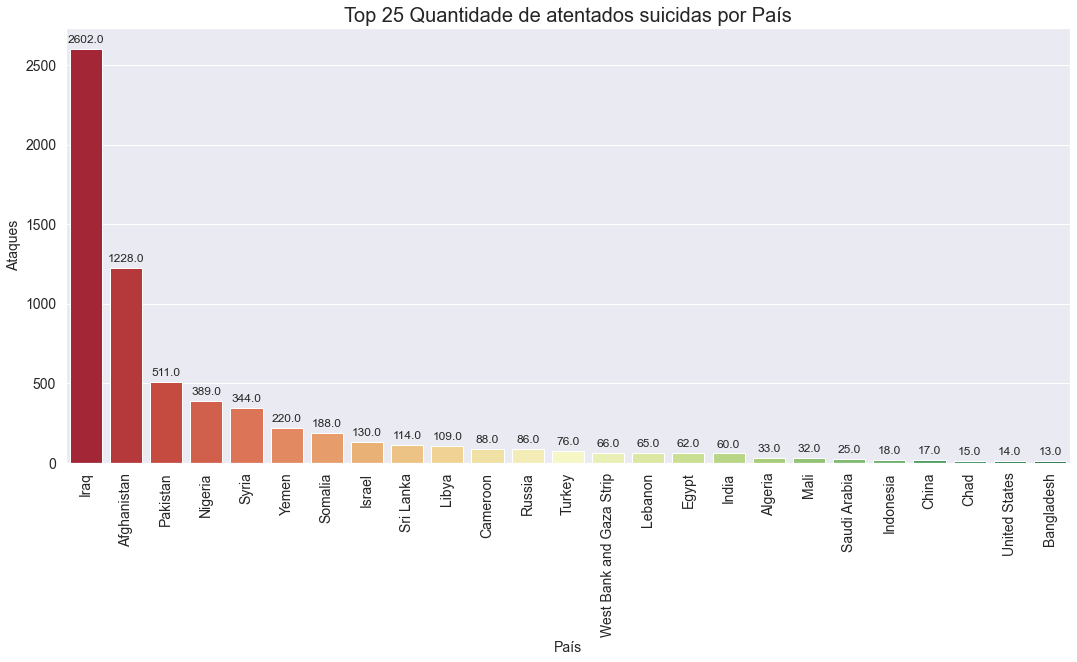

In [30]:
%matplotlib inline
plt.subplots(figsize=(18,8))
dfsr = df.groupby('Pais').Ataque_Suicida.sum().to_frame().reset_index().sort_values('Ataque_Suicida', ascending=False)[:25]
dfsr.columns = ['Pais', 'Ataque_Suicida']
splot = sns.barplot(data=dfsr, x='Pais', y='Ataque_Suicida', palette='RdYlGn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)
plt.ylabel("Ataques", fontsize = 14)
plt.xlabel("País", fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Top 25 Quantidade de atentados suicidas por País", fontsize = 20)
plt.show()

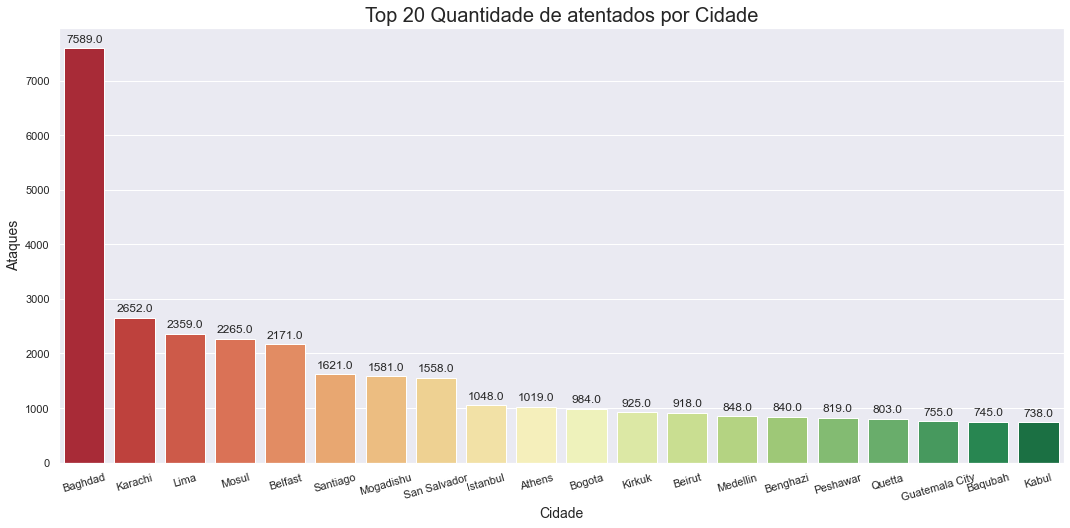

In [31]:
%matplotlib inline
plt.subplots(figsize=(18,8))
dfr = df.Cidade.value_counts().reset_index()[1:21]
dfr.columns= ['Cidade', 'Ataques']
splot = sns.barplot(data=dfr, x='Cidade', y='Ataques', palette='RdYlGn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)
plt.ylabel("Ataques", fontsize = 14)
plt.xlabel("Cidade", fontsize = 14)
plt.xticks(rotation=16)
plt.title("Top 20 Quantidade de atentados por Cidade", fontsize = 20)
plt.show()

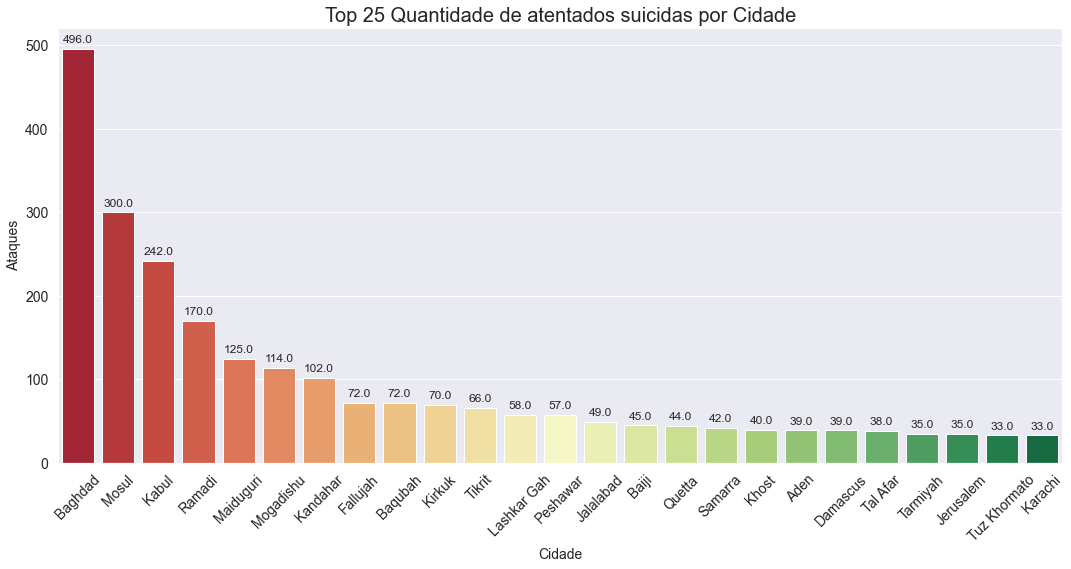

In [32]:
%matplotlib inline
plt.subplots(figsize=(18,8))
dfsr = df.groupby('Cidade').Ataque_Suicida.sum().to_frame().drop('Unknown').reset_index().sort_values('Ataque_Suicida', ascending=False)[0:25]
dfsr.columns = ['Cidade', 'Ataque_Suicida']
splot = sns.barplot(data=dfsr, x='Cidade', y='Ataque_Suicida', palette='RdYlGn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)
plt.ylabel("Ataques", fontsize = 14)
plt.xlabel("Cidade", fontsize = 14)
plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Top 25 Quantidade de atentados suicidas por Cidade", fontsize = 20)
plt.show()

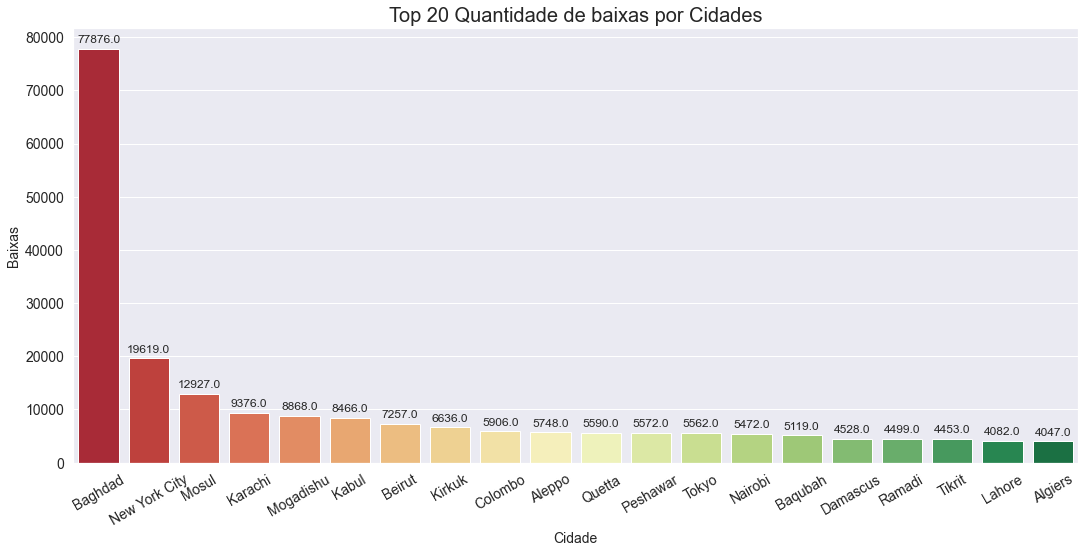

In [33]:
%matplotlib inline
plt.subplots(figsize=(18,8))
dfbp = df.groupby('Cidade').Baixas.sum().drop('Unknown').reset_index().sort_values('Baixas', ascending=False)[0:20]
dfbp.columns = ['Cidade', 'Baixas']
splot = sns.barplot(data=dfbp, x='Cidade', y='Baixas', palette='RdYlGn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)
plt.ylabel("Baixas", fontsize = 14)
plt.xlabel("Cidade", fontsize = 14)
plt.xticks(rotation = 30, fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Top 20 Quantidade de baixas por Cidades", fontsize = 20)
plt.show()

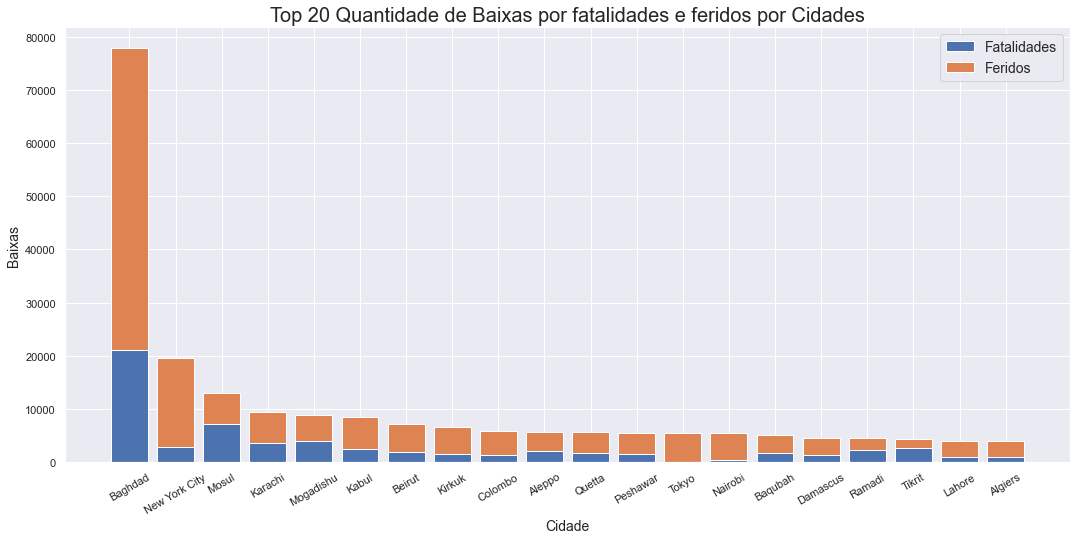

In [34]:
%matplotlib inline
dffr = df.groupby('Cidade')[['Fatalidades', 'Feridos']].sum().drop("Unknown").reset_index().sort_values(['Fatalidades', 'Feridos'], ascending=False)
dffr['Baixas'] = dffr.Fatalidades + dffr.Feridos
dffr.sort_values(by='Baixas', ascending=False, inplace=True)
dffr = dffr[:20]
fig, ax = plt.subplots(figsize=(18,8))
ax.bar(dffr['Cidade'], dffr['Fatalidades'], label='Fatalidades')
ax.bar(dffr['Cidade'], dffr['Feridos'], label='Feridos', bottom=dffr['Fatalidades'])
ax.set_title('Top 20 Quantidade de Baixas por fatalidades e feridos por Cidades')
ax.title.set_size(20)
ax.set_xlabel('Cidade')
plt.xticks(rotation=30)
ax.xaxis.label.set_size(14)
ax.set_ylabel('Baixas')
ax.yaxis.label.set_size(14)
plt.legend(prop={'size': 14})
plt.show()

# 5- Análises Sociopolíticas

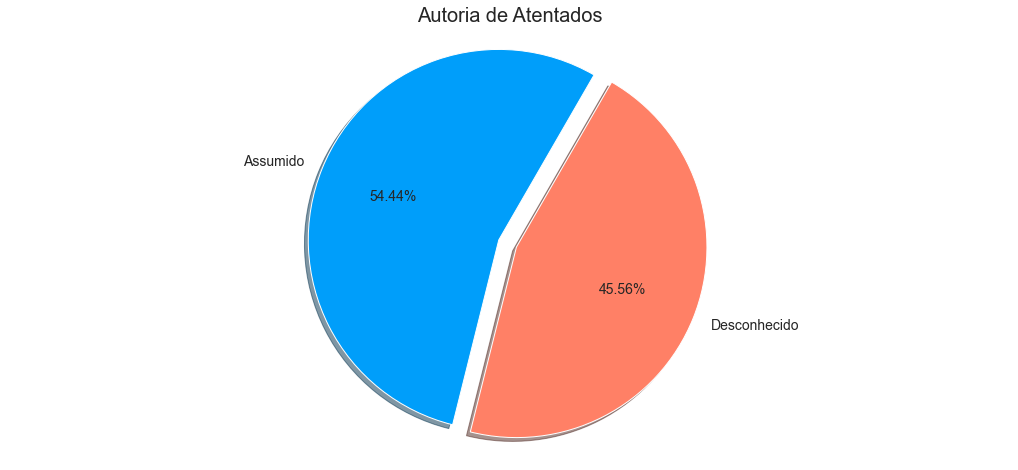

In [35]:
%matplotlib inline
plt.subplots(figsize=(18,8))
unknown = df.Grupo_Terrorista.value_counts()[0:1]
others = df.Grupo_Terrorista.value_counts().drop("Unknown")
labels = ['Assumido', 'Desconhecido']
values = [others.sum(0), unknown[0]]
colors = ['#009EFA', '#FF8066']
plt.title('Autoria de Atentados', fontsize = 20)
plt.pie(x=values, labels=labels, autopct='%.2f%%', explode=(0.1, 0), shadow=True, startangle= 60, colors= colors, textprops={'fontsize': 14})
plt.axis('equal')
plt.show()

In [36]:
dfr = df.Grupo_Terrorista.value_counts().drop("Unknown").reset_index()[0:20]
dfr.columns= ['Grupo_Terrorista', 'Ataques']
dfr

,Grupo_Terrorista,Ataques
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


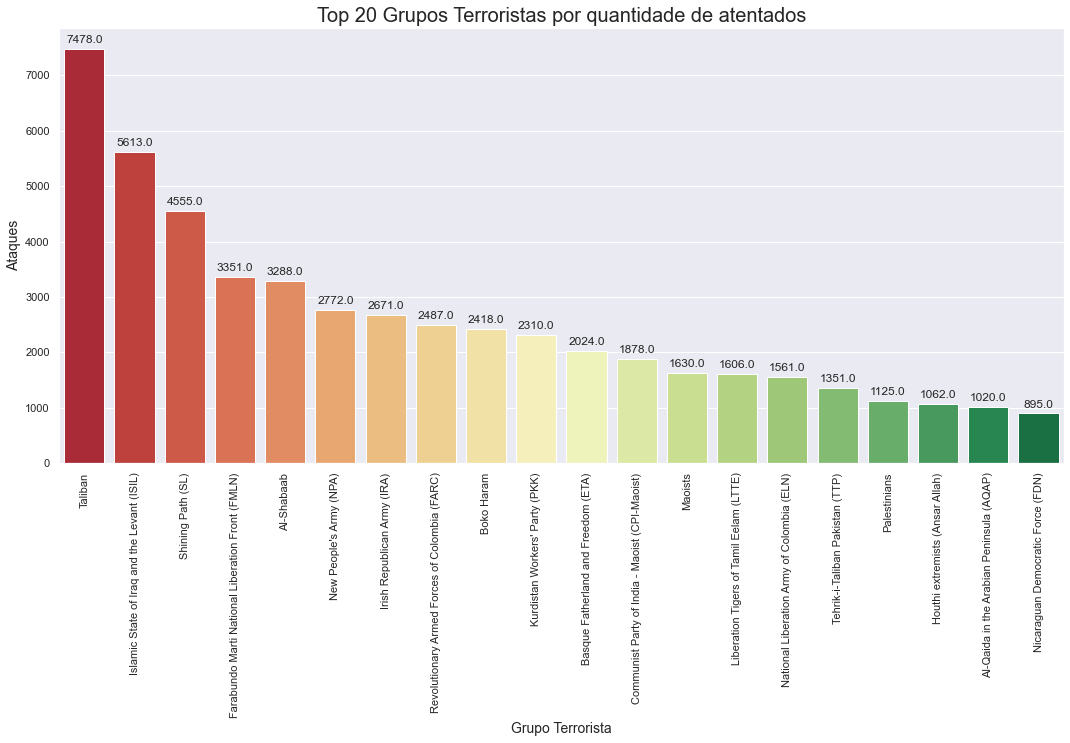

In [37]:
%matplotlib inline
plt.subplots(figsize=(18,8))
dfr = df.Grupo_Terrorista.value_counts().drop("Unknown").reset_index()[0:20]
dfr.columns= ['Grupo_Terrorista', 'Ataques']
splot = sns.barplot(data=dfr, x='Grupo_Terrorista', y='Ataques', palette='RdYlGn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', fontsize = 12)
plt.ylabel("Ataques", fontsize = 14)
plt.xlabel("Grupo Terrorista", fontsize = 14)
plt.xticks(rotation=90)
plt.title("Top 20 Grupos Terroristas por quantidade de atentados", fontsize = 20)
plt.show()

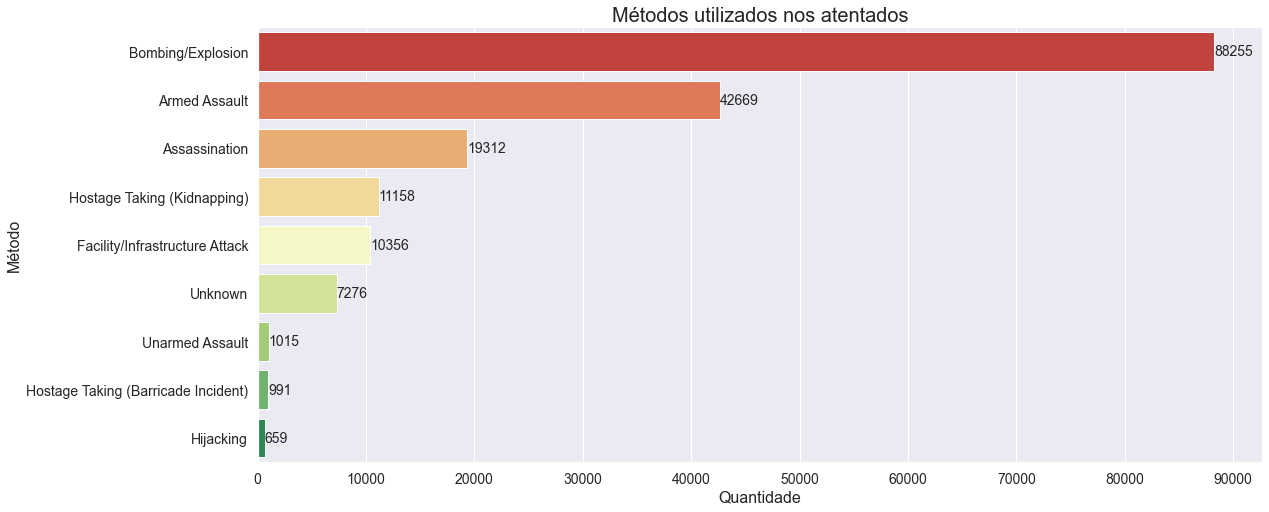

In [38]:
%matplotlib inline
plt.subplots(figsize=(18,8))
modus = df.Modo_Atentado.value_counts().reset_index()
modus.columns = ['Metodo', 'Quantidade']
splot = sns.barplot(data=modus, x='Quantidade', y='Metodo', palette='RdYlGn')
for i in splot.containers:
    splot.bar_label(i, fontsize = 14)
plt.ylabel("Método", fontsize = 16)
plt.xlabel("Quantidade", fontsize = 16)
plt.xticks(np.arange(0, 95000, 10000), fontsize=14)
plt.yticks(fontsize = 14)
plt.title("Métodos utilizados nos atentados", fontsize = 20)
plt.show()

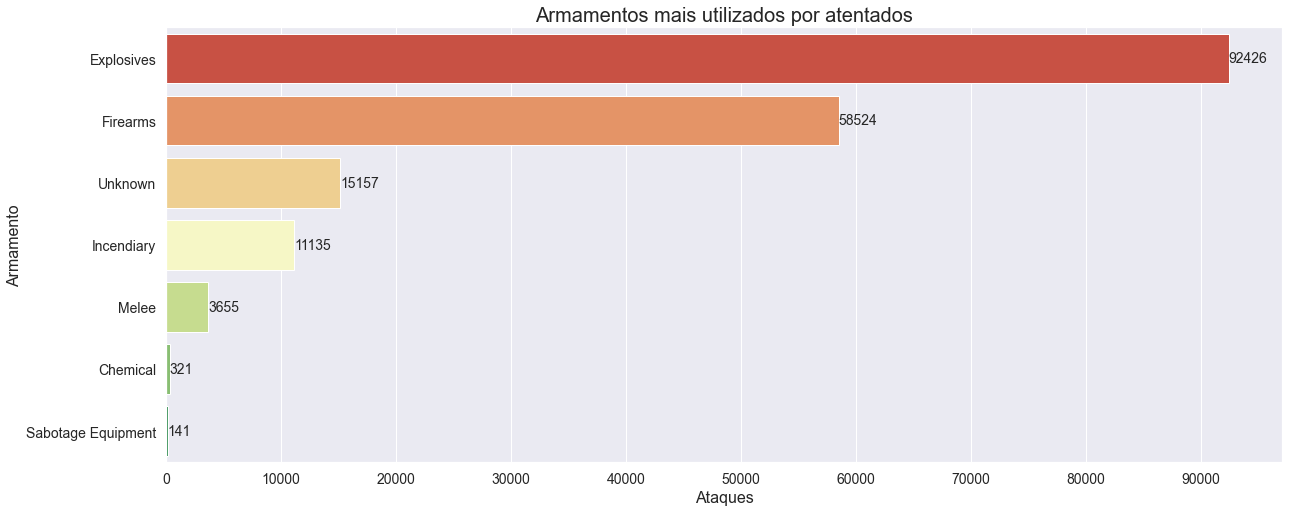

In [39]:
plt.subplots(figsize=(20,8))
dfg = df.Armamento.value_counts().reset_index()[:7]
dfg.columns = ['Armamento', 'Ataques']
splot = sns.barplot(data=dfg, x='Ataques', y='Armamento', palette='RdYlGn')
for i in splot.containers:
    splot.bar_label(i, fontsize = 14)
plt.ylabel("Armamento", fontsize = 16)
plt.xlabel("Ataques", fontsize = 16)
plt.xticks(np.arange(0, 95000, 10000), fontsize=14)
plt.yticks(fontsize = 14)
plt.title("Armamentos mais utilizados por atentados", fontsize = 20)
plt.show()

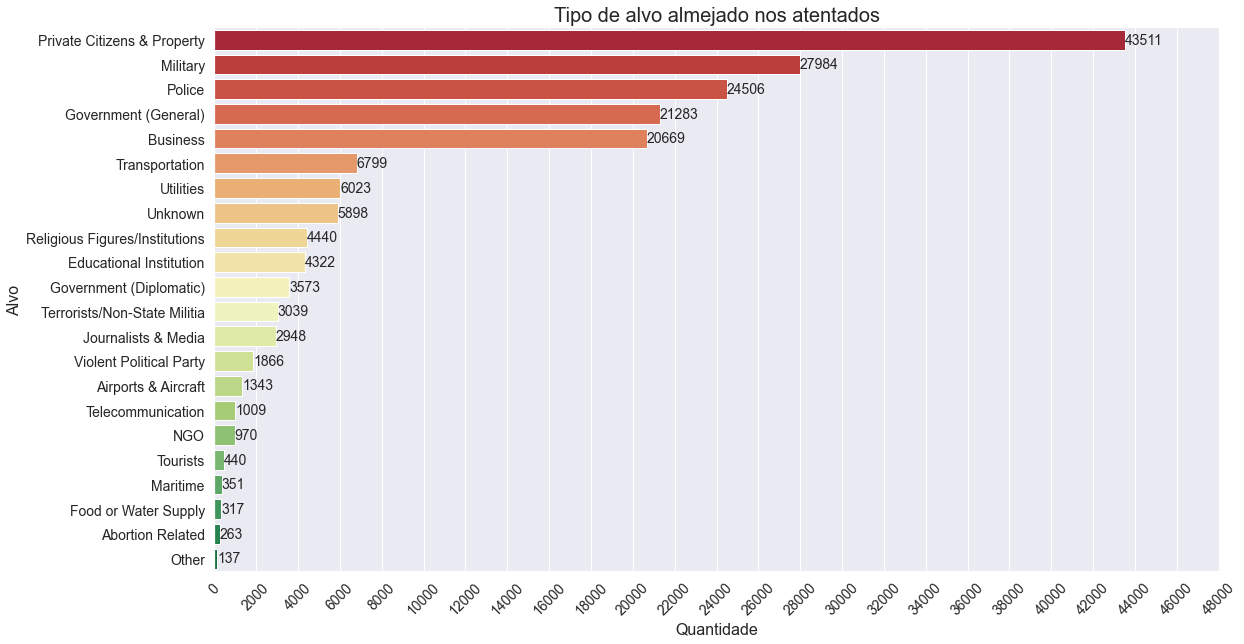

In [40]:
%matplotlib inline
plt.subplots(figsize=(18,10))
modus = df.Tipo_Alvo.value_counts().reset_index()
modus.columns = ['Alvo', 'Quantidade']
splot = sns.barplot(data=modus, x='Quantidade', y='Alvo', palette='RdYlGn')
for i in splot.containers:
    splot.bar_label(i, fontsize = 14)
plt.ylabel("Alvo", fontsize = 16)
plt.xlabel("Quantidade", fontsize = 16)
plt.xticks(np.arange(0, 50000, 2000), fontsize=14, rotation=45)
plt.yticks(fontsize = 14)
plt.title("Tipo de alvo almejado nos atentados", fontsize = 20)
plt.show()